In [1]:
pip uninstall gensim

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [2]:
import pandas as pd
from spellchecker import SpellChecker
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

## Data Acquidition

In [3]:
df = pd.read_csv('train.csv')
df = pd.DataFrame(df)

In [4]:
df.shape

(25000, 2)

In [5]:
df.head(10)

,review,sentiment
0,This Hong Kong filmed potboiler packs in more ...,1
1,I saw this movie being a Jane Austen addicted ...,1
2,This is a gem of a movie not just for people w...,1
3,"This musical was not quite what I expected, fo...",1
4,Kubrick again puts on display his stunning abi...,1
5,That film is absolutely fantastic!! If you wat...,1
6,"If you came into the film with expectations, t...",1
7,I think you would have to be from the USA to g...,1
8,I was surprised at how fascinating this movie ...,1
9,Liked Stanley & Iris very much. Acting was ver...,1


In [6]:
df.tail(10)

,review,sentiment
24990,This is the most messed up entry on IMDb that ...,0
24991,That is the best way I can describe this movie...,0
24992,Who in the world told Harrison Ford that this ...,0
24993,This has got to be one of the worst movies eve...,0
24994,Expectations were somewhat high for me when I ...,0
24995,"If you like movies about creepy towns, hotels,...",0
24996,Last year's remake of 'The Hills Have Eyes' wa...,0
24997,*** WARNING! SPOILERS CONTAINED HEREIN! ***<br...,0
24998,"The plot was predictable, and fighting with gu...",0
24999,Alright if you want to go see this movie just ...,0


## Data Cleaning

In [7]:
df[df.duplicated()]

,review,sentiment
2950,"While there aren't any talking animals, big la...",1
3041,THE JIST: See something else.<br /><br />This ...,1
3155,".......Playing Kaddiddlehopper, Col San Fernan...",1
3470,it's amazing that so many people that i know h...,1
4606,"During a Kurt Weill celebration in Brooklyn, W...",1
...,...,...
24404,"Yes, he is! ...No, not because of Pintilie lik...",0
24437,This film is so bad and gets worse in every im...,0
24443,"I absolutely hate this programme, what kind of...",0
24696,What was an exciting and fairly original serie...,0


In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.shape

(24904, 2)

## Text preprocessing

### LowerCasing

In [10]:
# LowerCasing reviews

df['review'] = df['review'].str.lower()

In [11]:
df['review'][80]

'this movie is very hilarious, and it has a great compilation of actors like william h. macy which always have perform this kind of roles, maybe his most representative, fargo; and george clooney which is a very good actor showing his comedian work in brothers cohen film "oh brother, where art thou?" which results to be one of my favorite movies ever! but it\'s been hard to find "welcome to collinwood", here in mexico. my city lacks of good places where to buy some good films. i tried to buy it at blockbuster but they don\'t know it by the original name, so maybe it will be a little easier to find if i have the name they gave to it in mexico, do someone knows it?, because i can\'t remember! cheers. a.'

* #### For effective text tokenization, the data in the review column, which was originally in higher case, was uniformly converted to lowercase.

### Removing HTML tags

In [12]:
test = "<p>Sarah had been searching for the <strong>perfect recipe</strong> for weeks when she finally found it on <a href=\"https://www.grandmaskitchen.com\">her grandmother's old cooking blog</a>, buried beneath years of <em>forgotten posts</em>.</p><p>She quickly bookmarked the page and shared it with her sister, adding a note: \"Remember how we used to make this every Sunday? The instructions are all here at <a href=\"https://www.grandmaskitchen.com/apple-pie\">this link</a>.</p>"
test

'<p>Sarah had been searching for the <strong>perfect recipe</strong> for weeks when she finally found it on <a href="https://www.grandmaskitchen.com">her grandmother\'s old cooking blog</a>, buried beneath years of <em>forgotten posts</em>.</p><p>She quickly bookmarked the page and shared it with her sister, adding a note: "Remember how we used to make this every Sunday? The instructions are all here at <a href="https://www.grandmaskitchen.com/apple-pie">this link</a>.</p>'

In [13]:
# Removing HTML tags ( <br />, < p >, < p /> ) and links

# Function for removing html tags
def drop_html_tags(doc):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', doc)

In [14]:
drop_html_tags(test)

'Sarah had been searching for the perfect recipe for weeks when she finally found it on her grandmother\'s old cooking blog, buried beneath years of forgotten posts.She quickly bookmarked the page and shared it with her sister, adding a note: "Remember how we used to make this every Sunday? The instructions are all here at this link.'

In [15]:
# Before
df['review'][100]

"you'd think you're in for some serious sightseeing when the premise of the movie takes place primarily between two characters as they travel 3000 miles or so from france to saudi arabia, going through most of europe - italy, bulgaria, croatia, slovenia, turkey, before arriving in the middle east. but this is not a tour, and there are no stopovers for soaking in the sights.<br /><br />reda's father is in his twilight years, and wishes to do the haj. however, since walking and taking the mule is out of the question, he chooses to travel to mecca by car. he can't drive, and therefore enlists the help of reda, to his son's protest, to get him there in their broken down vehicle.<br /><br />but reda doesn't see the point of having him go along, when his dad could opt for the plane. he resents the idea of having put his personal life on hold for this pilgrimage he couldn't understand. and hence, we set off in this arduous journey with father and son, being not the best of pals.<br /><br />th

In [16]:
# Apply drop_HTML_tags function on review column
df['review'] = df['review'].apply(drop_html_tags)

In [17]:
# After
df['review'][100]

"you'd think you're in for some serious sightseeing when the premise of the movie takes place primarily between two characters as they travel 3000 miles or so from france to saudi arabia, going through most of europe - italy, bulgaria, croatia, slovenia, turkey, before arriving in the middle east. but this is not a tour, and there are no stopovers for soaking in the sights.reda's father is in his twilight years, and wishes to do the haj. however, since walking and taking the mule is out of the question, he chooses to travel to mecca by car. he can't drive, and therefore enlists the help of reda, to his son's protest, to get him there in their broken down vehicle.but reda doesn't see the point of having him go along, when his dad could opt for the plane. he resents the idea of having put his personal life on hold for this pilgrimage he couldn't understand. and hence, we set off in this arduous journey with father and son, being not the best of pals.the beauty of this movie is to witness

### Droping punctuation

In [18]:
# Taking a test review to test drop_punc function which will remove punctuation
punc_test = df['review'][80]
punc_test

'this movie is very hilarious, and it has a great compilation of actors like william h. macy which always have perform this kind of roles, maybe his most representative, fargo; and george clooney which is a very good actor showing his comedian work in brothers cohen film "oh brother, where art thou?" which results to be one of my favorite movies ever! but it\'s been hard to find "welcome to collinwood", here in mexico. my city lacks of good places where to buy some good films. i tried to buy it at blockbuster but they don\'t know it by the original name, so maybe it will be a little easier to find if i have the name they gave to it in mexico, do someone knows it?, because i can\'t remember! cheers. a.'

In [19]:
# Removing punctuation
exclude = string.punctuation
# Function for removing punctuation
def drop_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [20]:
drop_punc(punc_test)

'this movie is very hilarious and it has a great compilation of actors like william h macy which always have perform this kind of roles maybe his most representative fargo and george clooney which is a very good actor showing his comedian work in brothers cohen film oh brother where art thou which results to be one of my favorite movies ever but its been hard to find welcome to collinwood here in mexico my city lacks of good places where to buy some good films i tried to buy it at blockbuster but they dont know it by the original name so maybe it will be a little easier to find if i have the name they gave to it in mexico do someone knows it because i cant remember cheers a'

In [21]:
# Removing punctuation from review column

df['review'] = df['review'].apply(drop_punc)

* #### By eliminating punctuation during preprocessing, the data is simplified through the creation of uniform tokens. This, in turn, reduces the complexity and computational demands for NLP models, enabling them to focus more effectively on the text's core semantic meaning.

## Data Exploration

In [22]:
df['sentiment'].value_counts()

sentiment
1    12472
0    12432
Name: count, dtype: int64

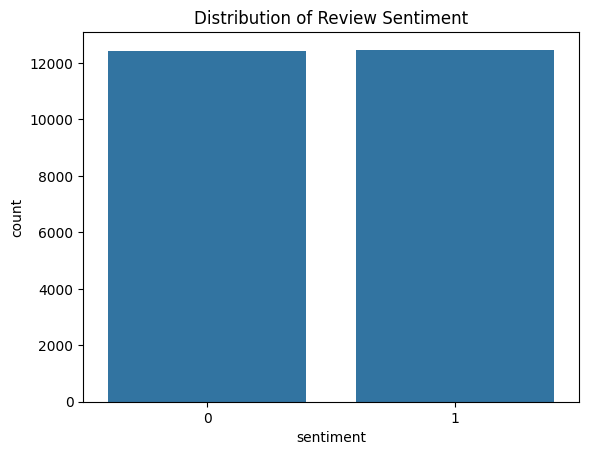

In [23]:
sns.countplot(data=df,x='sentiment',)
plt.title('Distribution of Review Sentiment')
plt.show()

In [24]:
sample_pos = df[df['sentiment']==1].sample(1500)
sample_neg = df[df['sentiment']==0].sample(1500)

In [25]:
def drop_stopwords(text):
    return " ".join([" " if i in stopwords.words('english') else i for i in text.split()])

In [26]:
sample_pos['review'] = sample_pos['review'].apply(drop_stopwords)
sample_neg['review'] = sample_neg['review'].apply(drop_stopwords)

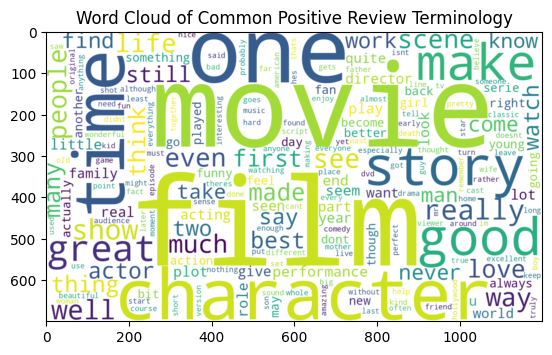

In [27]:
all_words = ''.join([''.join(words) for words in sample_pos['review']])
wordcloud = WordCloud(width = 1200,height = 700, background_color='white').generate(all_words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Word Cloud of Common Positive Review Terminology')
plt.show()

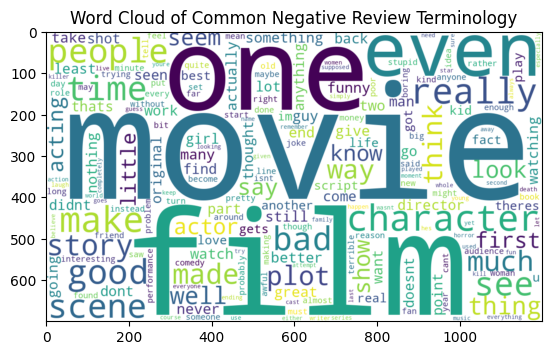

In [28]:
all_words = ''.join([''.join(words) for words in sample_neg['review']])
wordcloud = WordCloud(width = 1200,height = 700, background_color='white').generate(all_words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Word Cloud of Common Negative Review Terminology')
plt.show()

### Spelling Correction

In [29]:
# incorrect spelling example
wr_txt = "what i speaak is truae"

In [30]:
spell = TextBlob(wr_txt)
spell.correct().string

'what i speak is true'

In [31]:
# Function for spelling correction
def correct_spellings(text):
    return TextBlob(text).correct().string

In [32]:
correct_spellings(wr_txt)

'what i speak is true'

In [33]:
#df['review'] = df['review'].apply(correct_spellings)

### Tokenization

In [34]:
# def tokenize(doc):
#     for i in range(len(df['review'])):
#         review = df['review'][i]
#         token = word_tokenize(review)
        
    

### Removing Stopwords

In [35]:
#Applying Stopwords on review column
df['review'] = df['review'].apply(drop_stopwords)

In [36]:
print(df['review'][100])

youd think youre       serious sightseeing     premise     movie takes place primarily   two characters     travel 3000 miles       france   saudi arabia going       europe italy bulgaria croatia slovenia turkey   arriving     middle east           tour         stopovers   soaking     sightsredas father       twilight years   wishes       haj however since walking   taking   mule         question   chooses   travel   mecca   car   cant drive   therefore enlists   help   reda     sons protest   get         broken   vehiclebut reda doesnt see   point       go along     dad could opt     plane   resents   idea     put   personal life   hold     pilgrimage   couldnt understand   hence   set       arduous journey   father   son       best   palsthe beauty     movie     witness   development     father   son pair   challenges   face   weird people   meet     duke       varied weather conditions   alternating rest stops   motels   sleeping     car   see   obvious generation gap     trying   c

### Text Stemming

In [37]:
ps = PorterStemmer()
def stemming(doc):
    return " ".join([ps.stem(i) for i in doc.split()])

In [38]:
df['review'] = df['review'].apply(stemming)

In [39]:
df['review'][100]

'youd think your seriou sightse premis movi take place primarili two charact travel 3000 mile franc saudi arabia go europ itali bulgaria croatia slovenia turkey arriv middl east tour stopov soak sightsreda father twilight year wish haj howev sinc walk take mule question choos travel mecca car cant drive therefor enlist help reda son protest get broken vehiclebut reda doesnt see point go along dad could opt plane resent idea put person life hold pilgrimag couldnt understand henc set arduou journey father son best palsth beauti movi wit develop father son pair challeng face weird peopl meet duke vari weather condit altern rest stop motel sleep car see obviou gener gap tri commun father tri impos son son tri assert adult circumst see reveal reda quit fish water mani encount actual team quit well despit differencesit perhap quit apt film releas last week coincid hari raya haji opportun watch protagonist join pilgrim haj final scene mecca truli sight behold would feel claustrophobia fear re

### Train test split

In [40]:
#split the dataset  
#train dataset
train_reviews=df.review[:20000]
train_sentiments=df.sentiment[:20000]
#test dataset
test_reviews=df.review[20000:]
test_sentiments=df.sentiment[20000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(20000,) (20000,)
(4904,) (4904,)


In [41]:
train_sentiments=df.sentiment[:20000]
test_sentiments=df.sentiment[20000:]
print(train_sentiments)
print(test_sentiments)

0        1
1        1
2        1
3        1
4        1
        ..
20051    0
20052    0
20053    0
20054    0
20055    0
Name: sentiment, Length: 20000, dtype: int64
20056    0
20057    0
20058    0
20059    0
20060    0
        ..
24995    0
24996    0
24997    0
24998    0
24999    0
Name: sentiment, Length: 4904, dtype: int64


### Bag of words

In [42]:
cv=CountVectorizer(max_features=9600)
#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',train_reviews.shape)
print('BOW_cv_test:',test_reviews.shape)

BOW_cv_train: (20000,)
BOW_cv_test: (4904,)


In [43]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

LogisticRegression(C=1, max_iter=500, random_state=42)


In [44]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

[0 0 1 ... 0 0 0]


In [45]:
# Accuracy score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.8091353996737357


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(cv_train_reviews,train_sentiments)
y_pred2 = knn.predict(cv_test_reviews)
score2  = accuracy_score(test_sentiments,lr_bow_predict)
print(score2)

0.8091353996737357


In [47]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=30)
tree.fit(cv_train_reviews,train_sentiments)
y_pred3 = tree.predict(cv_test_reviews)
score3  = accuracy_score(test_sentiments,lr_bow_predict)
print(score3)

0.8091353996737357


In [48]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(cv_train_reviews,train_sentiments)
y_pred4 = forest.predict(cv_test_reviews)
score4  = accuracy_score(test_sentiments,lr_bow_predict)
print(score4)

0.8091353996737357
